In [1]:
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

from sage.visualization.vistool_pipeline import VisTool
from sage.visualization.visual_utils import plot_vismap, Assembled

In [2]:
from sage.config import load_config
from sage.training.trainer import MRITrainer

cfg = load_config()
trainer = MRITrainer(cfg)

Use cuda:0 as a device.
Output from encoder is 128.
Total Number of parameters: 905549
TOTAL TRAIN 1161 | VALID 291
MIXED PRECISION:: True


In [3]:
encoder = trainer.models['encoder']
regressor = trainer.models['regressor']
del trainer

import torch
torch.cuda.empty_cache()

In [4]:
model = Assembled(encoder, regressor)

PREFIX = 'G:/My Drive/brain_data/workspace/result/models/20210814-1815/'
SUFFIX = 'ep159_mae6.28.pt'

weights = {
    'encoder': f"{PREFIX}/encoder/{SUFFIX}",
    'regressor': f"{PREFIX}/regressor/{SUFFIX}",
}

model.load_weight(weights)

Weights successfully loaded!


In [5]:
from sage.data.dataloader import get_dataloader

cfg.batch_size = 1
train_dataloader = get_dataloader(cfg, test=False)
valid_dataloader = get_dataloader(cfg, test=True)

batch = next(iter(train_dataloader))
x, y, _ = batch

In [6]:
gcam = VisTool(cfg, model, cam_type='gcam')

In [7]:
vismap = gcam.run_vistool(x, y, visualize=False)

tensor([[72.8573]], device='cuda:0', grad_fn=<AddmmBackward>)
[true] 73 [pred] 72.857


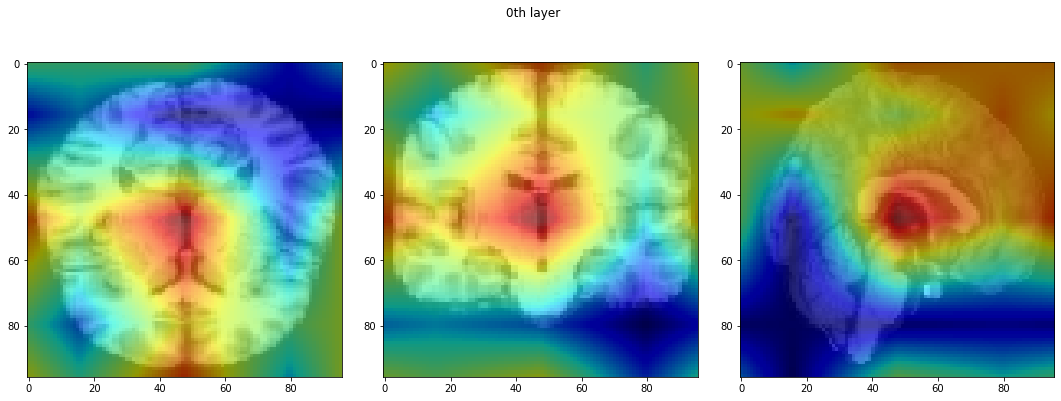

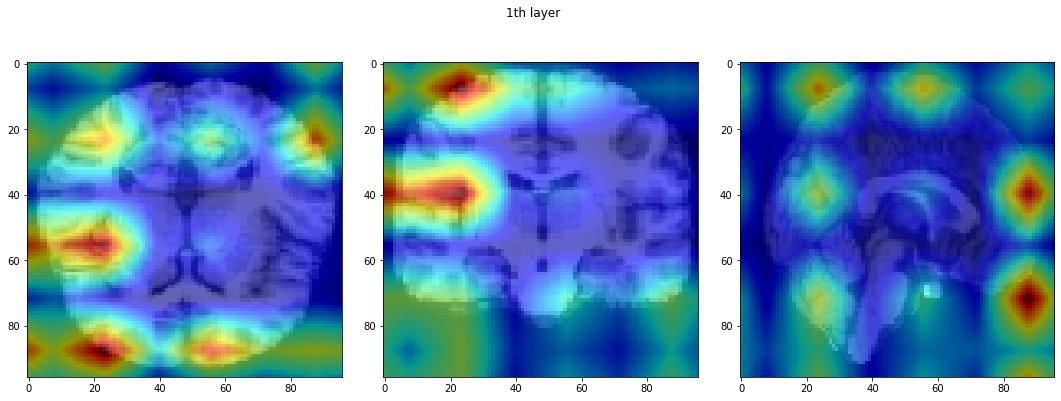

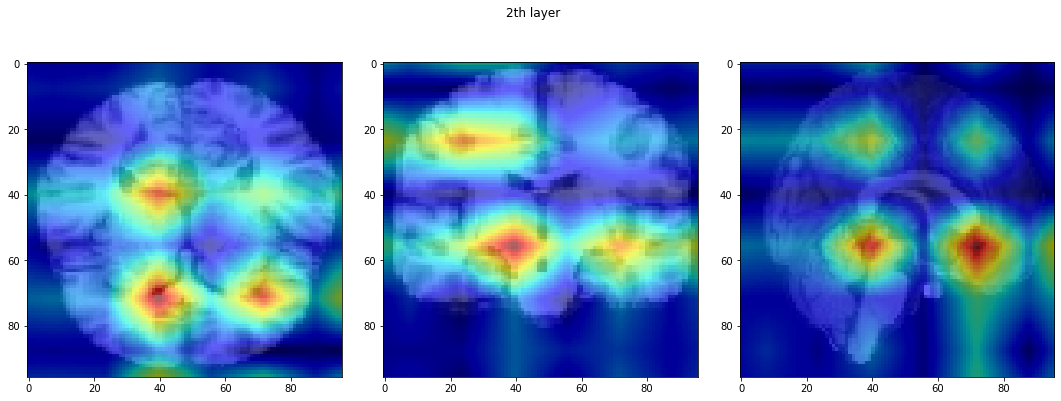

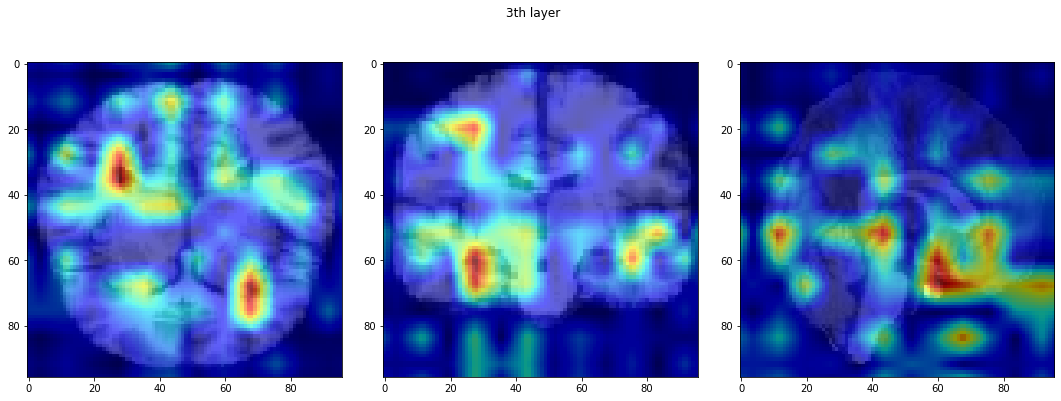

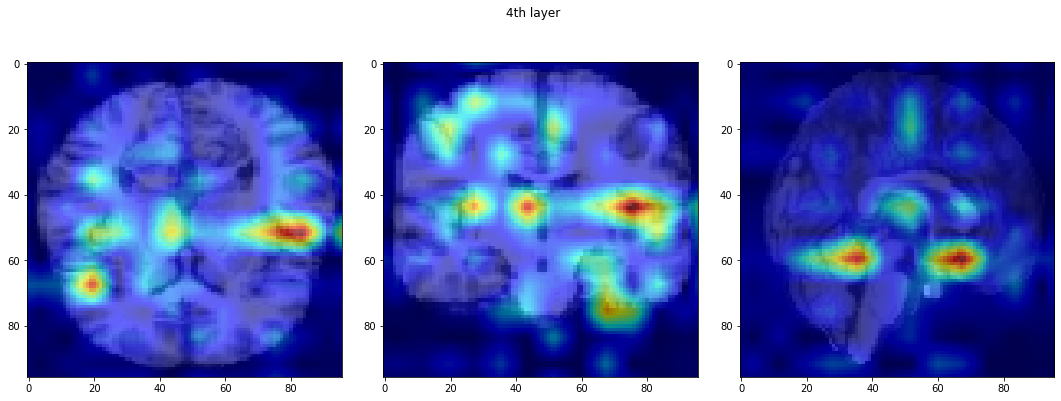

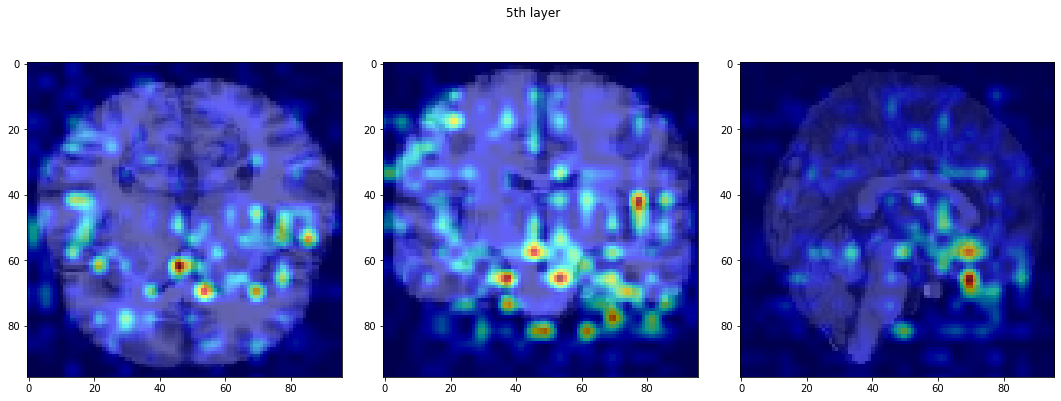

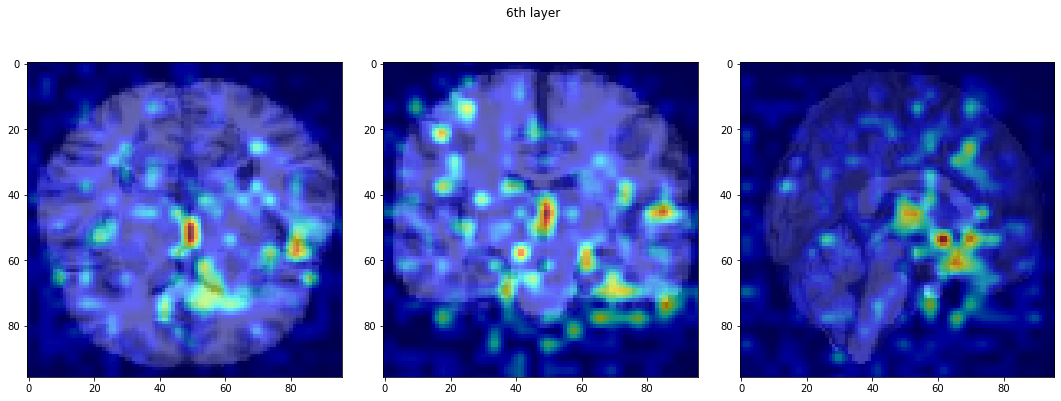

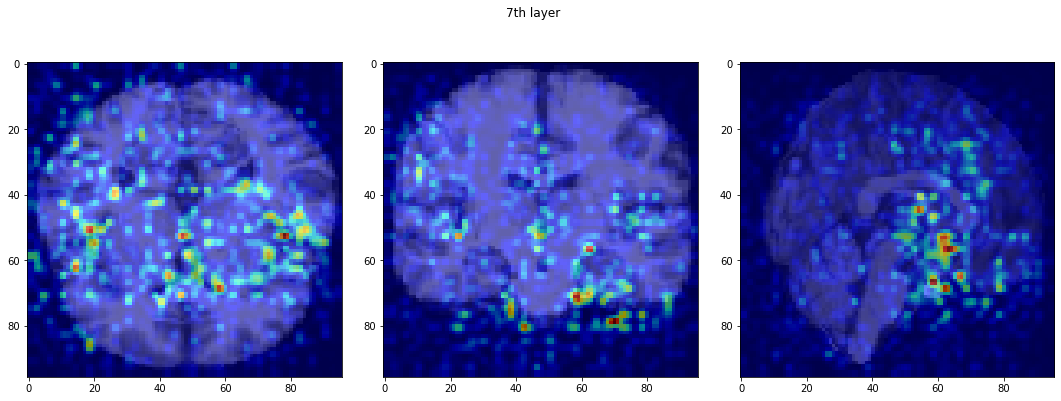

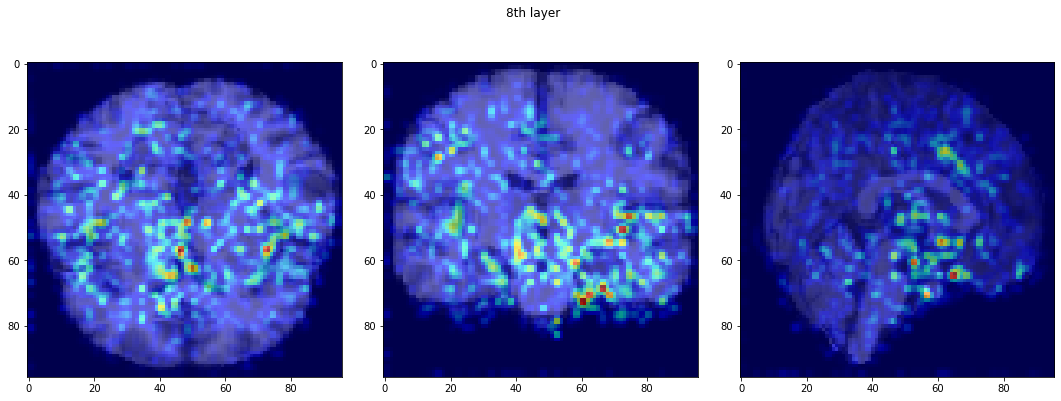

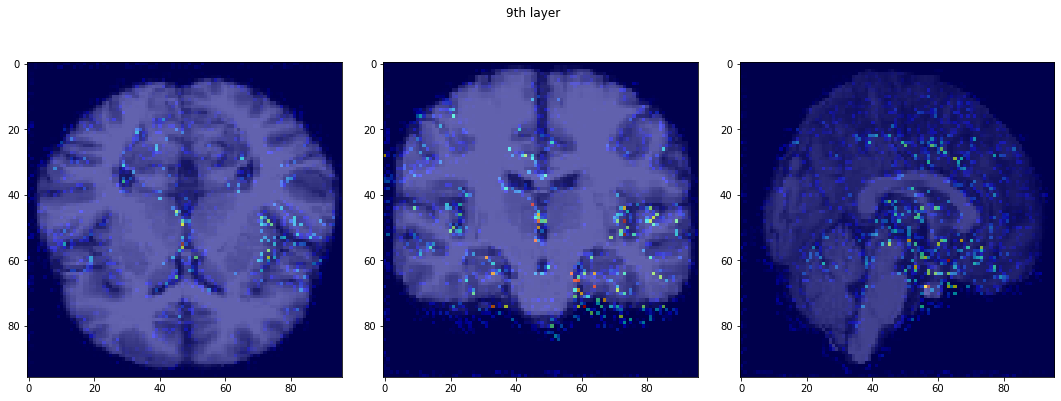

In [9]:
for idx, layer in enumerate(vismap):
    plot_vismap(x, vismap[idx], title=f"{idx}th layer")

In [8]:
gcam.run_pretrains_dataloader(model_path, train_dataloader, layer_index=4, visualize=True)

ValueError: invalid literal for int() with base 10: '159_mae6.28.pt'